# Problem Statement

The Germany City Rainfall Dataset offers comprehensive weather data for major cities across Germany, covering rainfall, temperature, humidity, and other environmental variables. It includes city-specific details such as geographical coordinates and climate types, enabling analysis of how climate factors influence monthly rainfall levels.

In this notebook, we analyze the dataset to estimate monthly rainfall based on temperature, humidity, and other climate-related variables. Insights from this analysis can support applications in agriculture, urban planning, water resource management, and climate change research.

# Data Definition


City: Name of the city.
    
Latitude: City's latitude in degrees.

Longitude: City's longitude in degrees.

Month: The month number (1-12).

Year: The year of the data.
    
Rainfall (mm): Rainfall amount in millimeters.

Elevation (m): City’s elevation above sea level in meters.

Climate_Type: The climate classification of the city.

Temperature (°C): Average temperature for the month in Celsius.

Humidity (%): Average humidity level for the month in percentage.

# Step-1 Import libraries and read the data 

In [15]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings ('ignore')
from sklearn.preprocessing import *
plt.rcParams['figure.figsize']=[15,8]

In [16]:
df = pd.read_csv('Rainfall_Data_Germany_Complete.csv')
df

,City,Latitude,Longitude,Month,Year,Rainfall (mm),Elevation (m),Climate_Type,Temperature (°C),Humidity (%)
0,Berlin,52.5200,13.405,1,2015,71.56,34,Oceanic,19.6,72
1,Berlin,52.5200,13.405,2,2015,129.56,34,Oceanic,31.4,88
2,Berlin,52.5200,13.405,3,2015,24.58,34,Oceanic,15.4,61
3,Berlin,52.5200,13.405,4,2015,177.73,34,Oceanic,15.1,62
4,Berlin,52.5200,13.405,5,2015,100.62,34,Oceanic,-3.0,57
...,...,...,...,...,...,...,...,...,...,...
1075,Hanover,52.3759,9.732,8,2023,34.14,55,Oceanic,32.2,61
1076,Hanover,52.3759,9.732,9,2023,6.09,55,Oceanic,12.2,57
1077,Hanover,52.3759,9.732,10,2023,40.89,55,Oceanic,-0.2,30
1078,Hanover,52.3759,9.732,11,2023,68.08,55,Oceanic,15.5,89


# Step-2  Understand the data

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   City              1080 non-null   object 
 1   Latitude          1080 non-null   float64
 2   Longitude         1080 non-null   float64
 3   Month             1080 non-null   int64  
 4   Year              1080 non-null   int64  
 5   Rainfall (mm)     1080 non-null   float64
 6   Elevation (m)     1080 non-null   int64  
 7   Climate_Type      1080 non-null   object 
 8   Temperature (°C)  1080 non-null   float64
 9   Humidity (%)      1080 non-null   int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 84.5+ KB


In [19]:
df.shape

(1080, 10)

In [20]:
df.size

10800

In [21]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
City,1080,10,Berlin,108,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Latitude,1080.0,NaN,NaN,NaN,51.00241,1.576498,48.1351,50.1109,51.13905,52.3759,53.5511
Longitude,1080.0,NaN,NaN,NaN,10.24219,2.351316,6.7735,8.6821,9.86285,12.3731,13.7373
Month,1080.0,NaN,NaN,NaN,6.5,3.453652,1.0,3.75,6.5,9.25,12.0
Year,1080.0,NaN,NaN,NaN,2019.0,2.583185,2015.0,2017.0,2019.0,2021.0,2023.0
Rainfall (mm),1080.0,NaN,NaN,NaN,99.211787,57.560449,0.0,49.5,99.425,149.5275,199.91
Elevation (m),1080.0,NaN,NaN,NaN,127.2,145.90981,6.0,37.0,83.5,113.0,519.0
Climate_Type,1080,2,Oceanic,648,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature (°C),1080.0,NaN,NaN,NaN,14.724259,11.43338,-5.0,4.975,14.85,24.3,34.9
Humidity (%),1080.0,NaN,NaN,NaN,65.153704,20.303775,30.0,47.0,66.0,83.0,99.0


In [22]:
col = df.columns.to_list()
col

['City',
 'Latitude',
 'Longitude',
 'Month',
 'Year',
 'Rainfall (mm)',
 'Elevation (m)',
 'Climate_Type',
 'Temperature (°C)',
 'Humidity (%)']

# Step-3 Check for duplicate rows

In [24]:
df[df.duplicated]

,City,Latitude,Longitude,Month,Year,Rainfall (mm),Elevation (m),Climate_Type,Temperature (°C),Humidity (%)


In [25]:
df.isnull().sum()

City                0
Latitude            0
Longitude           0
Month               0
Year                0
Rainfall (mm)       0
Elevation (m)       0
Climate_Type        0
Temperature (°C)    0
Humidity (%)        0
dtype: int64

# Step-4 Check for anomalies

In [27]:
for i in col:
    print(i)
    print(df[i].unique())

City
['Berlin' 'Munich' 'Hamburg' 'Cologne' 'Frankfurt' 'Stuttgart'
 'Dusseldorf' 'Dresden' 'Leipzig' 'Hanover']
Latitude
[52.52   48.1351 53.5511 50.9375 50.1109 48.7758 51.2277 51.0504 51.3397
 52.3759]
Longitude
[13.405  11.582   9.9937  6.9603  8.6821  9.1829  6.7735 13.7373 12.3731
  9.732 ]
Month
[ 1  2  3  4  5  6  7  8  9 10 11 12]
Year
[2015 2016 2017 2018 2019 2020 2021 2022 2023]
Rainfall (mm)
[ 71.56 129.56  24.58 ...  40.89  68.08 102.12]
Elevation (m)
[ 34 519   6  37 112 245  38 113  55]
Climate_Type
['Oceanic' 'Continental']
Temperature (°C)
[19.6 31.4 15.4 15.1 -3.  -3.6 17.  12.5 28.6  1.4 -4.  13.   4.5 24.
 -0.5 19.3  6.2  1.9 10.2 27.1 10.7 25.   0.  25.9 22.1 17.6 32.2 10.5
 -2.4 -4.2 28.1 16.  26.   4.4  8.8 -3.8 33.5 21.7 32.3  5.6 19.5  7.7
 28.9 32.9 30.4 24.6  6.1  6.3 -4.6 23.6 23.2 19.9 34.6  7.5  8.6 -1.8
 12.7  5.4  8.7 28.4 32.4  2.4  9.9 32.1 -2.5 -1.3  1.5 18.8  1.  33.7
 12.9  4.9 13.8 21.5 25.2 18.1 31.2 27.7 25.3 -2.8 -4.7  3.5 11.4 11.1
 30.8  7.6 

# Step-5 Check for data types of all cols and treating it


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   City              1080 non-null   object 
 1   Latitude          1080 non-null   float64
 2   Longitude         1080 non-null   float64
 3   Month             1080 non-null   int64  
 4   Year              1080 non-null   int64  
 5   Rainfall (mm)     1080 non-null   float64
 6   Elevation (m)     1080 non-null   int64  
 7   Climate_Type      1080 non-null   object 
 8   Temperature (°C)  1080 non-null   float64
 9   Humidity (%)      1080 non-null   int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 84.5+ KB


### Treating the month and year column 

In [31]:
df['Year']

0       2015
1       2015
2       2015
3       2015
4       2015
        ... 
1075    2023
1076    2023
1077    2023
1078    2023
1079    2023
Name: Year, Length: 1080, dtype: int64

# Step-6 Separating numeric and categoric columns 

In [33]:
num = df.select_dtypes(include=np.number).columns.to_list()
num

['Latitude',
 'Longitude',
 'Month',
 'Year',
 'Rainfall (mm)',
 'Elevation (m)',
 'Temperature (°C)',
 'Humidity (%)']

In [34]:
cat = df.select_dtypes(exclude=np.number).columns.to_list()
cat

['City', 'Climate_Type']

# Step-7 Stats Analysis

In [36]:
df[num].describe()

,Latitude,Longitude,Month,Year,Rainfall (mm),Elevation (m),Temperature (°C),Humidity (%)
count,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.00000,1080.000000,1080.000000
mean,51.002410,10.242190,6.500000,2019.000000,99.211787,127.20000,14.724259,65.153704
std,1.576498,2.351316,3.453652,2.583185,57.560449,145.90981,11.433380,20.303775
min,48.135100,6.773500,1.000000,2015.000000,0.000000,6.00000,-5.000000,30.000000
25%,50.110900,8.682100,3.750000,2017.000000,49.500000,37.00000,4.975000,47.000000
50%,51.139050,9.862850,6.500000,2019.000000,99.425000,83.50000,14.850000,66.000000
75%,52.375900,12.373100,9.250000,2021.000000,149.527500,113.00000,24.300000,83.000000
max,53.551100,13.737300,12.000000,2023.000000,199.910000,519.00000,34.900000,99.000000


In [37]:
df[cat].describe()

,City,Climate_Type
count,1080,1080
unique,10,2
top,Berlin,Oceanic
freq,108,648


# Step-8 Check for outliers

In [39]:
Q3 = df[num].quantile(0.75)
Q1 = df[num].quantile(0.25)
IQR = Q3 - Q1
IQR

Latitude              2.2650
Longitude             3.6910
Month                 5.5000
Year                  4.0000
Rainfall (mm)       100.0275
Elevation (m)        76.0000
Temperature (°C)     19.3250
Humidity (%)         36.0000
dtype: float64

In [40]:
for i in num:
    Q3 = df[i].quantile(0.75)
    Q1 = df[i].quantile(0.25)
    IQR = Q3 - Q1
    LW = Q1-(1.5*IQR)
    UW = Q3+(1.5*IQR)
    out = df[(df[i] < LW) | (df[i] > UW)]
    ot_percen=(len(out)/len(df))*100
    print(f" Outliers of {i} :",ot_percen)

 Outliers of Latitude : 0.0
 Outliers of Longitude : 0.0
 Outliers of Month : 0.0
 Outliers of Year : 0.0
 Outliers of Rainfall (mm) : 0.0
 Outliers of Elevation (m) : 20.0
 Outliers of Temperature (°C) : 0.0
 Outliers of Humidity (%) : 0.0


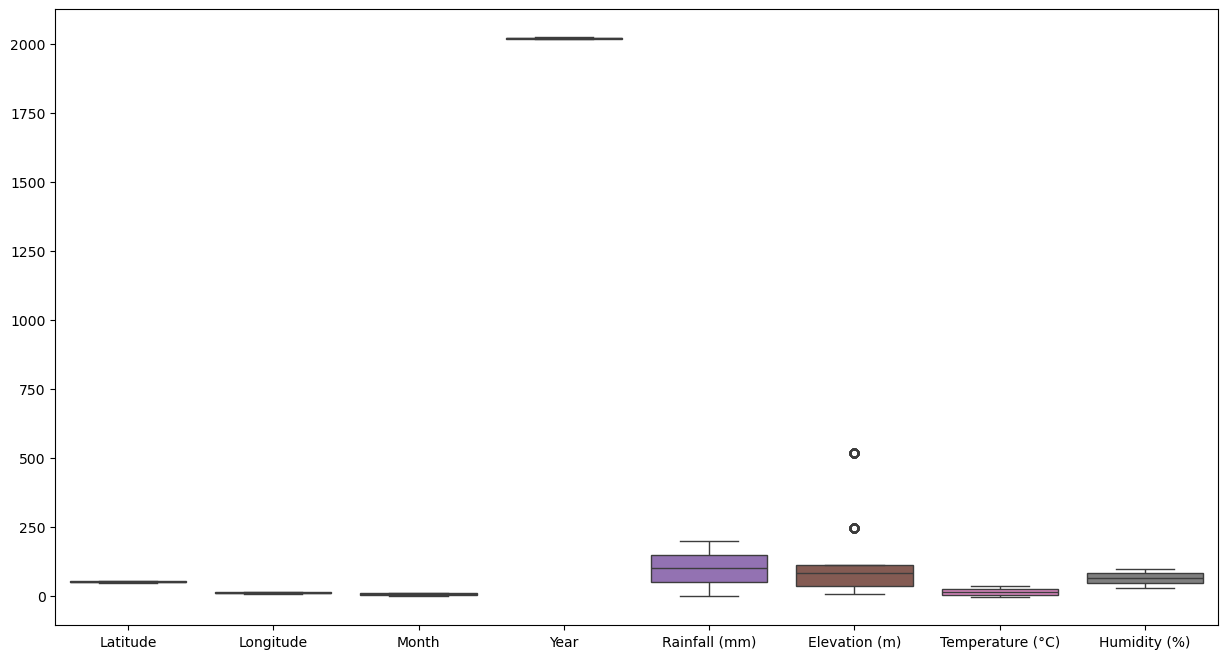

In [41]:
sns.boxplot(df[num])
plt.show()

# Step-9 Deep Analysis

### Univariate Analysis for numerical and categorical column

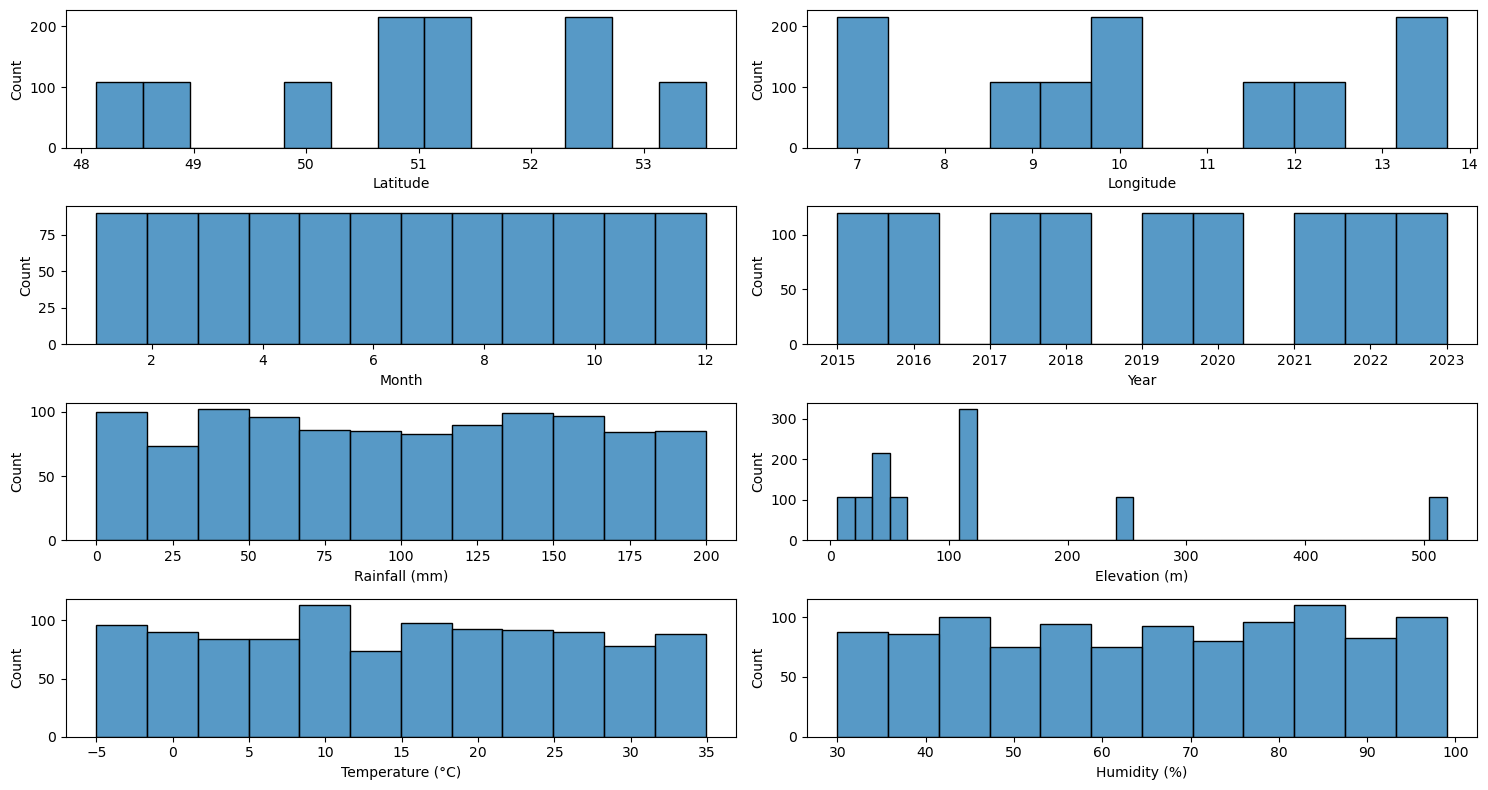

In [44]:
t = 1
for i in num:
    plt.subplot(4,2,t)
    sns.histplot(x=df[i])
    t+=1
    plt.xlabel(i)
plt.tight_layout()
plt.show()

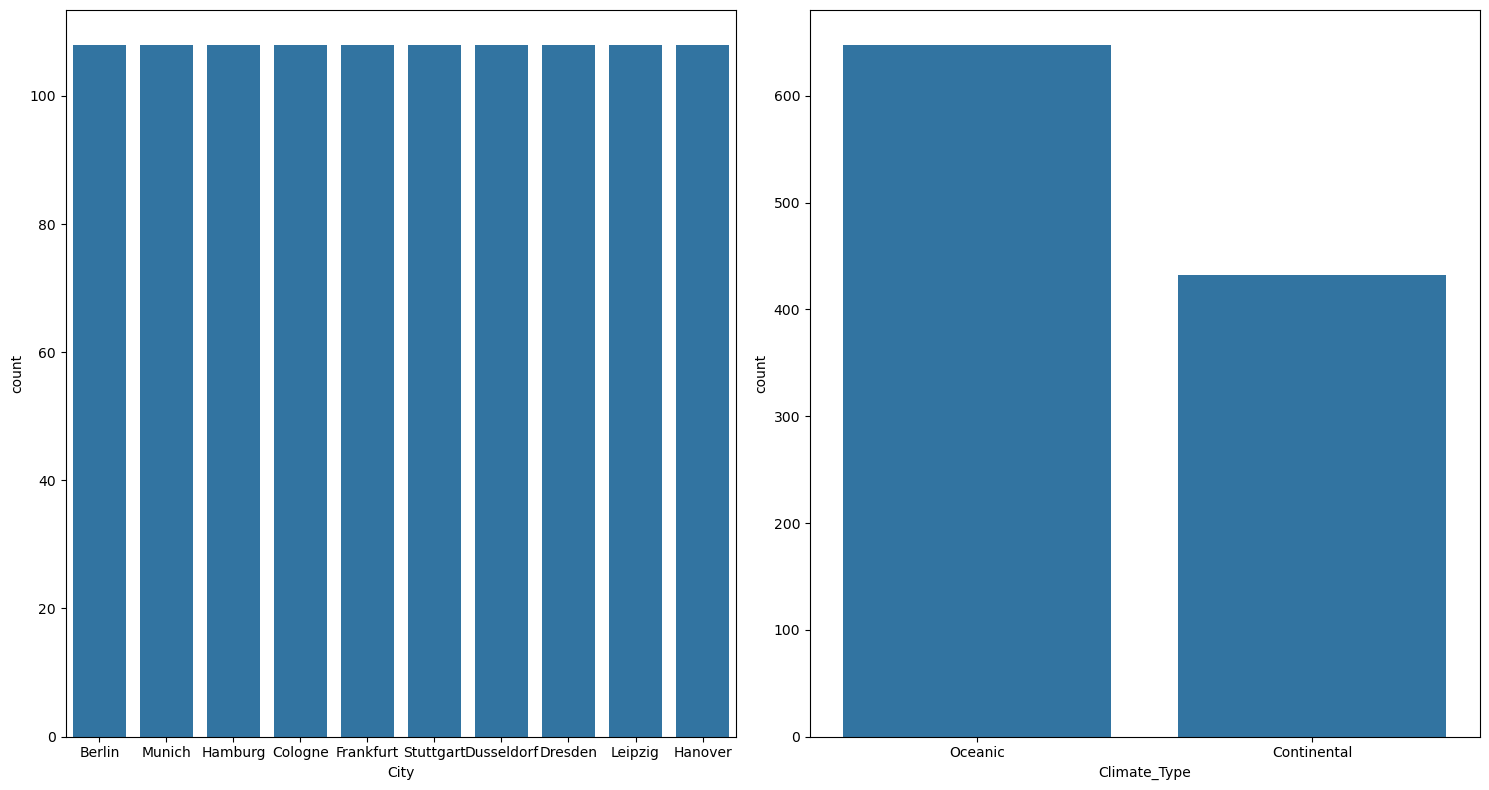

In [45]:
t = 1
for i in cat:
    plt.subplot(1,2,t)
    sns.countplot(x=df[i])
    t+=1
    plt.xlabel(i)
plt.tight_layout()
plt.show()

### Bivariate Analysis for numerical and categorical column

### Num vs Num

In [48]:
import plotly.express as px
from datetime import datetime

#### Correlation between Temperature and Rainfall 

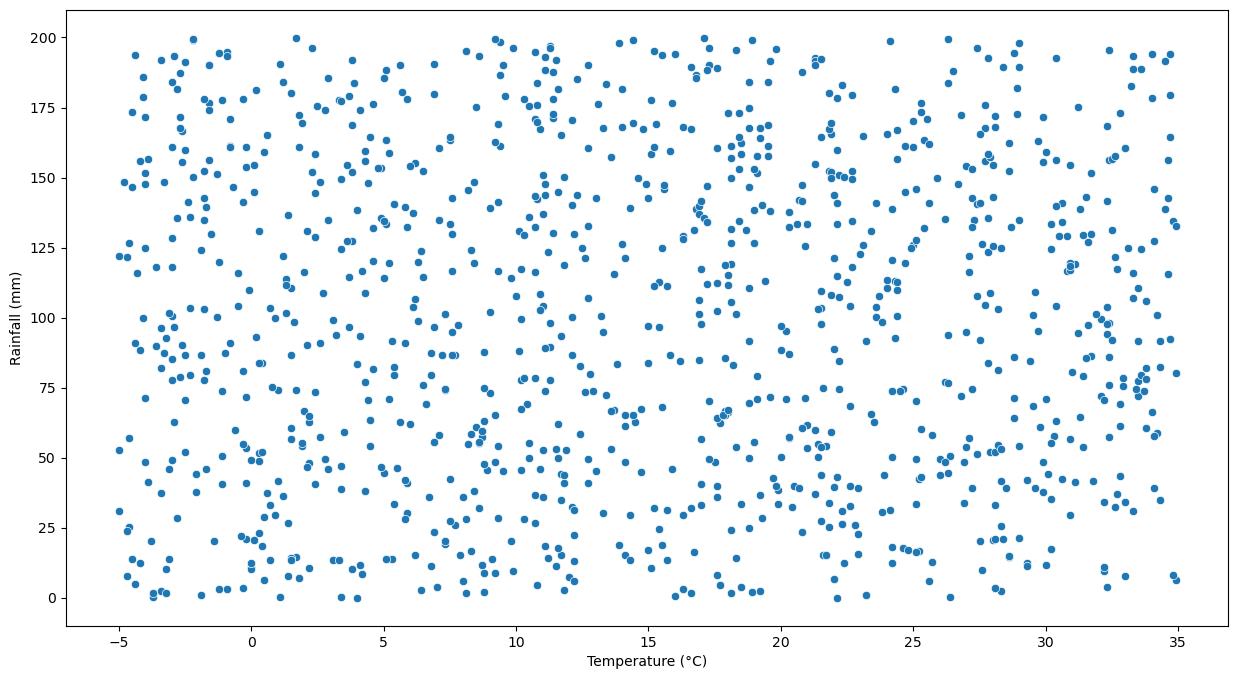

In [50]:
sns.scatterplot(x = df['Temperature (°C)'],y = df['Rainfall (mm)'])
plt.show()

#### Average Rainfall by Month

In [52]:
monthly_rainfall = df.groupby('Month')['Rainfall (mm)'].mean().reset_index()
fig = px.line(monthly_rainfall, x='Month', y='Rainfall (mm)', title='Average Rainfall by Month')
fig.show(renderer='iframe_connected')

#### Monthly Rainfall Distribution

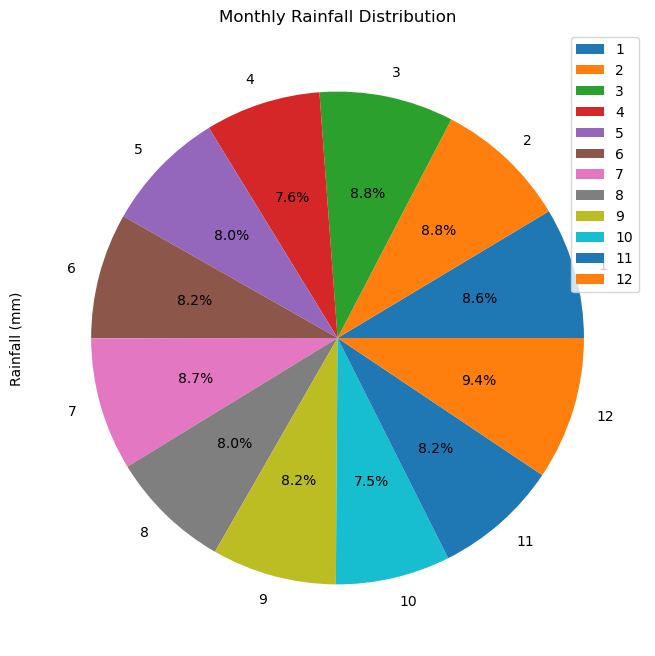

In [54]:
monthly_rainfall = df.groupby('Month')['Rainfall (mm)'].mean().reset_index()
monthly_rainfall.plot(kind='pie', y='Rainfall (mm)', labels=monthly_rainfall['Month'], autopct='%1.1f%%')
plt.title('Monthly Rainfall Distribution')
plt.show()

### Num vs Cat

<Axes: xlabel='City'>

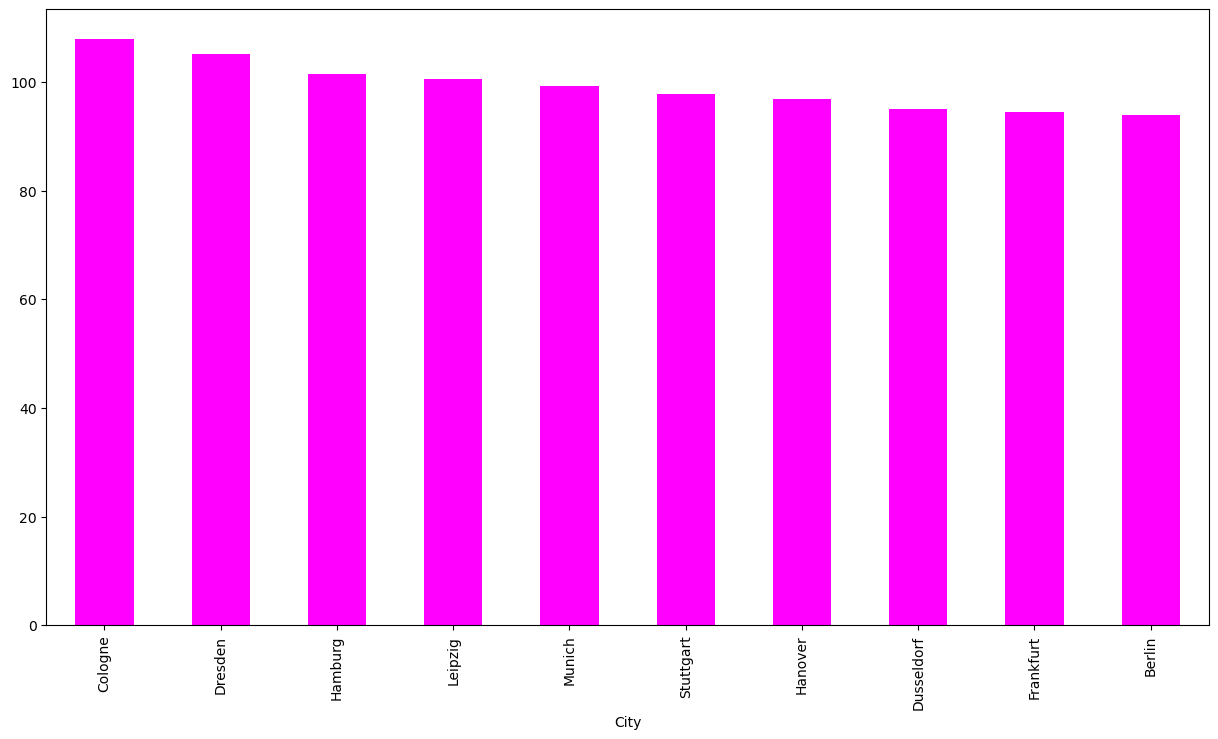

In [56]:
avg_city = df.groupby('City')['Rainfall (mm)'].mean().sort_values(ascending=False).plot(kind='bar',color='magenta')
avg_city

### Cat vs Cat

<Axes: xlabel='City'>

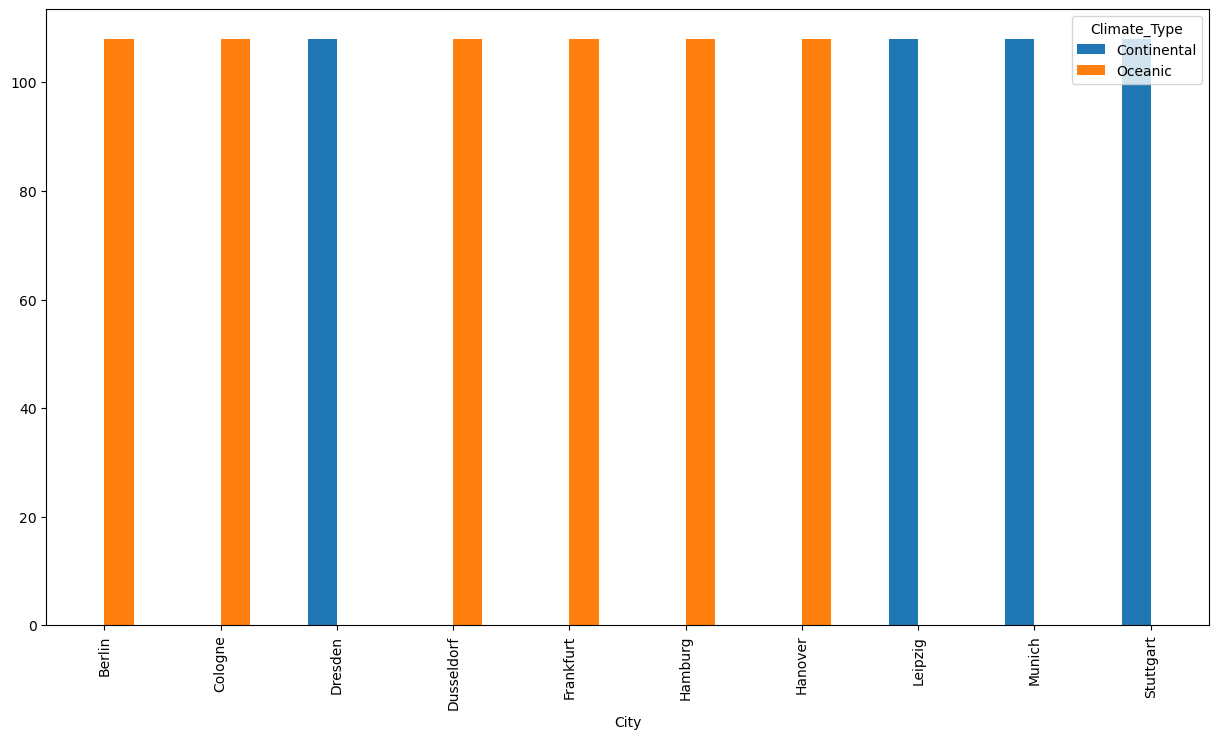

In [58]:
pd.crosstab(df['City'],df['Climate_Type']).plot(kind='bar')

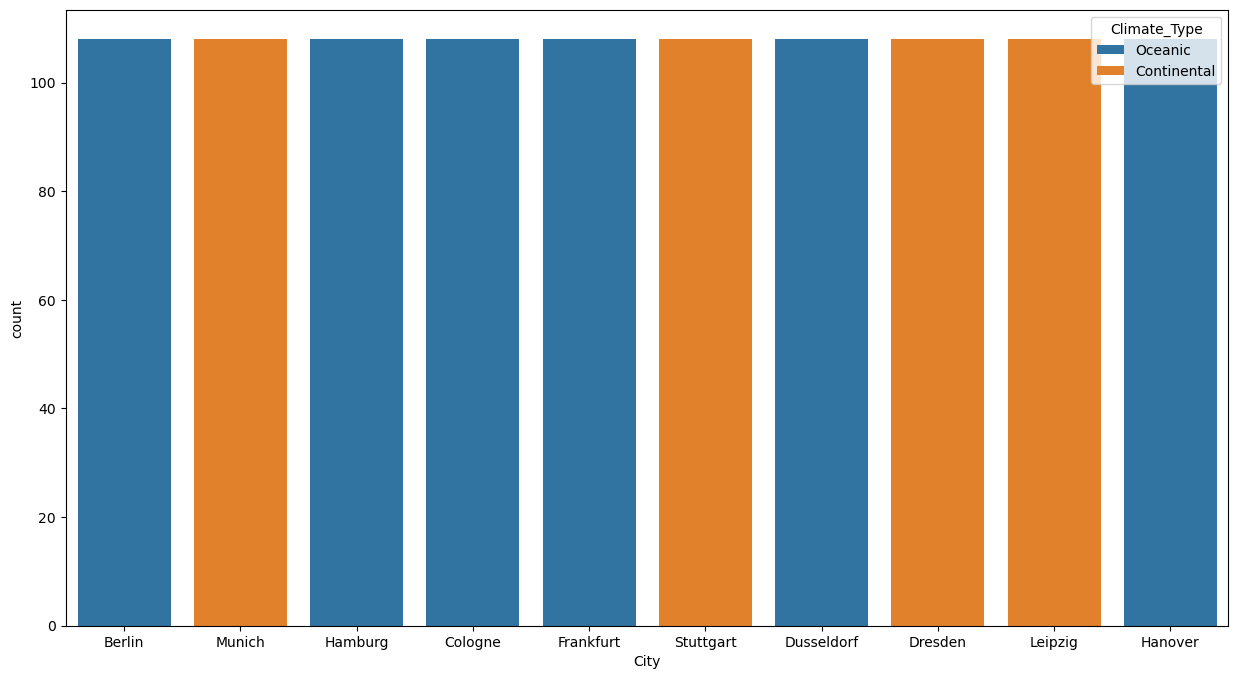

In [59]:
sns.countplot(x=df['City'],hue=df['Climate_Type'])
plt.show()

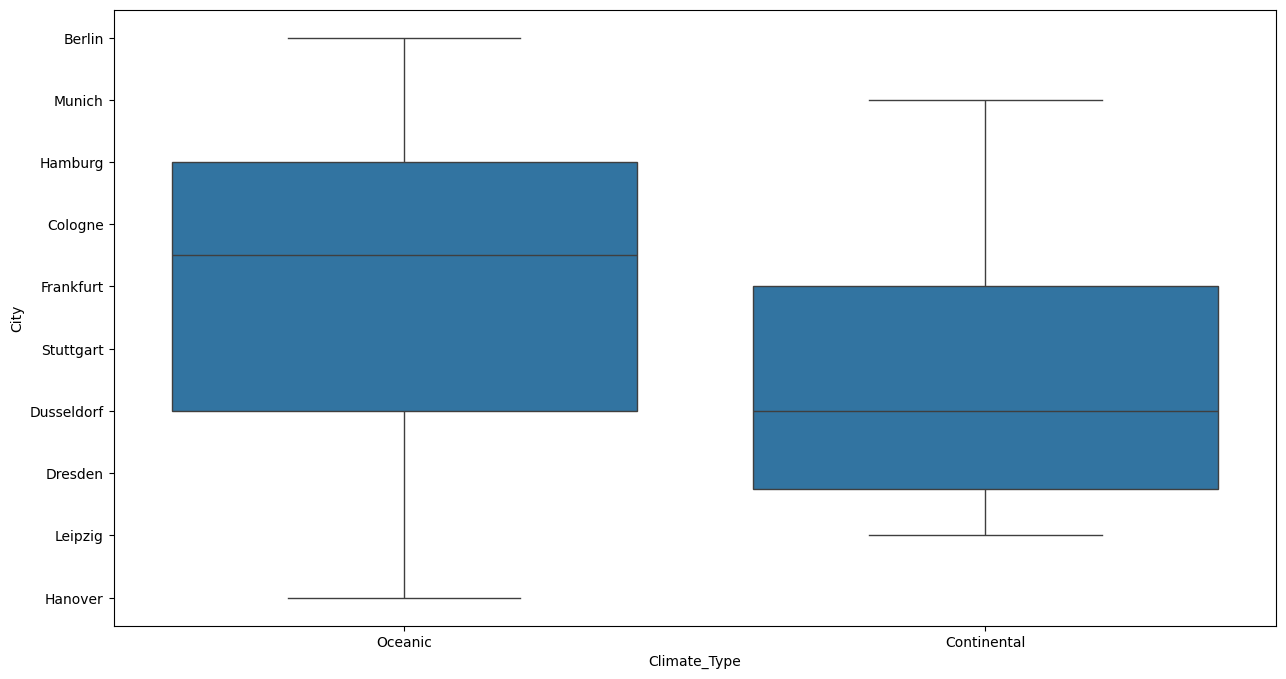

In [60]:
sns.boxplot(x=df['Climate_Type'],y=df['City'])
plt.show()

### Multivariate Analysis

#### Num vs Num vs Cat

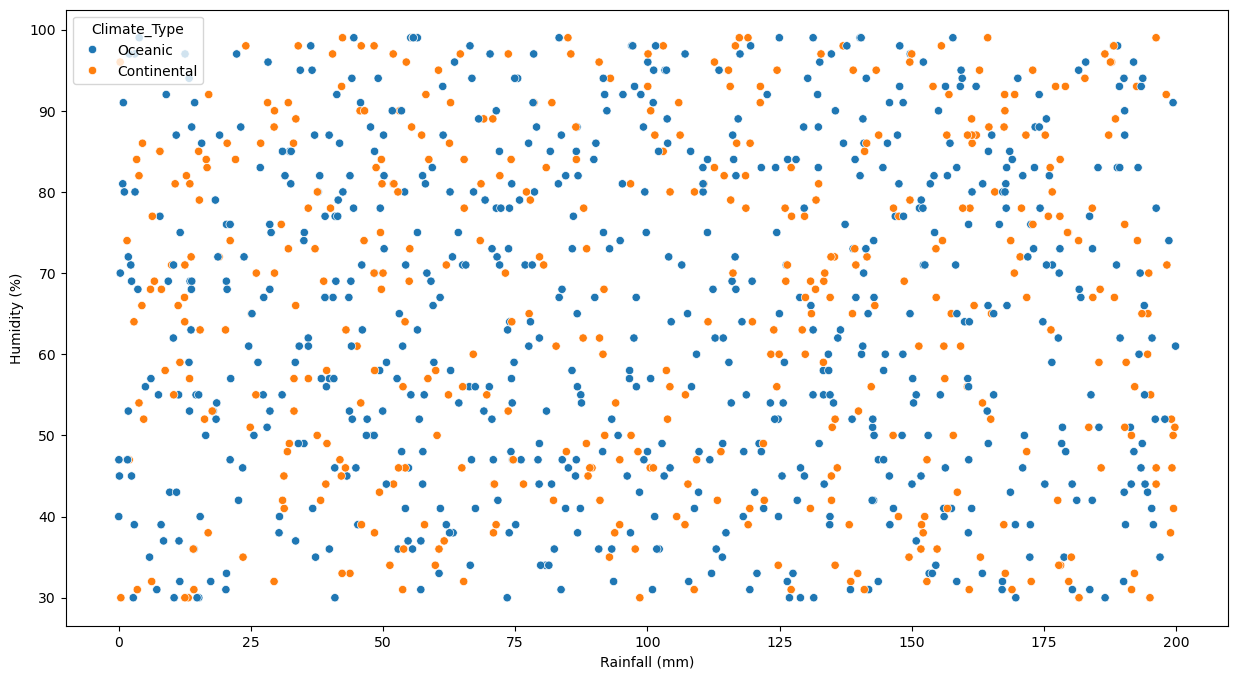

In [63]:
sns.scatterplot(x=df['Rainfall (mm)'],y=df['Humidity (%)'],hue=df['Climate_Type'])
plt.show()

Inference:
    There is no correlation 

### Num vs Cat vs Cat

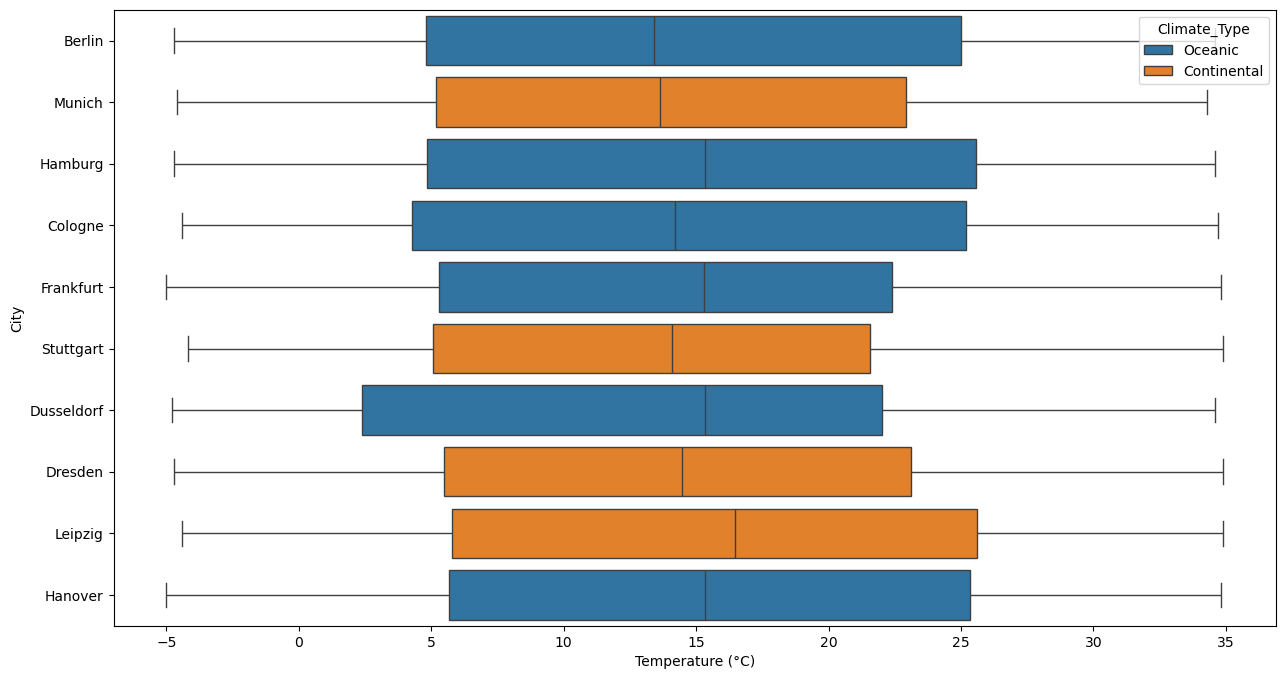

In [66]:
sns.boxplot(x=df['Temperature (°C)'],y=df['City'],hue=df['Climate_Type'])
plt.show()

Inference:
     There is no outliers.

### Heat Map

<Axes: >

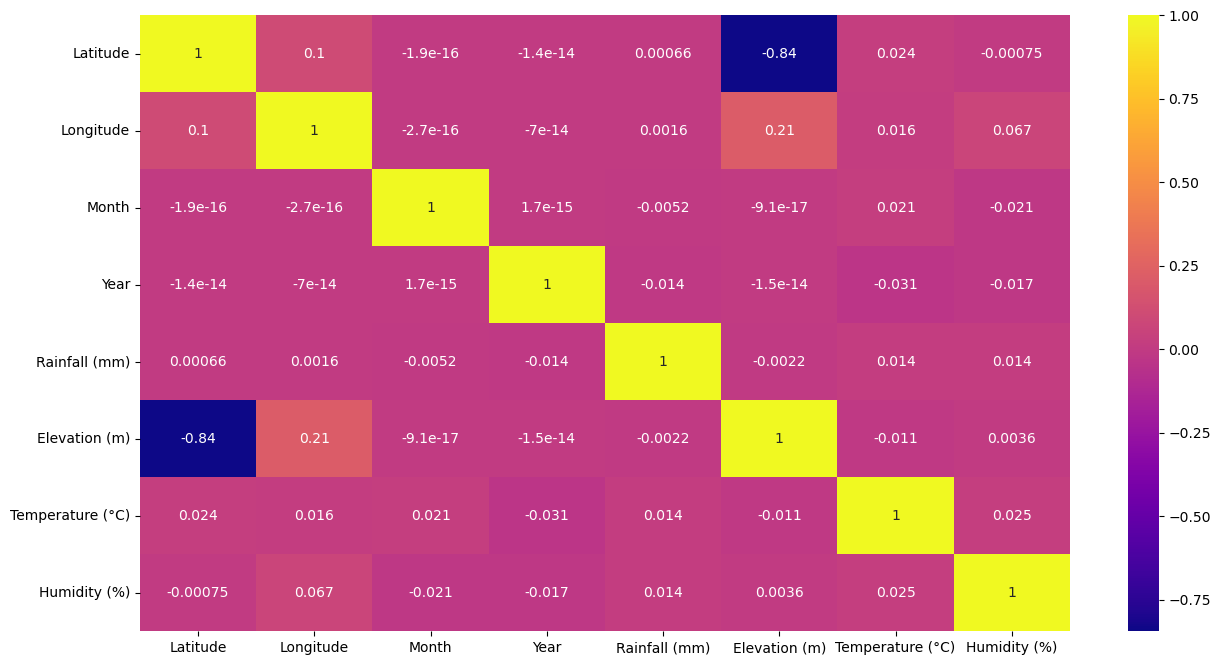

In [69]:
sns.heatmap(data=df[num].corr(),annot=True,cmap='plasma',cbar=True)

# Step-10 Hypothesis Testing

### Num vs Num

#### PearsonR

In [73]:
from scipy import stats

In [74]:
stats.pearsonr(x=df['Temperature (°C)'],y=df['Rainfall (mm)'])

PearsonRResult(statistic=0.014216763964975024, pvalue=0.6407194794249492)

### Num vs Cat

##### for more than 2 categories in cat

#### Anova

In [78]:
from scipy.stats import shapiro
from scipy.stats import levene
from scipy.stats import f_oneway

In [79]:
# test_stat, p_value = stats.shapiro('Rainfall (mm)')

In [80]:
# levene

In [81]:
group1 = df[df['Climate_Type'] == 'Type1']['Rainfall (mm)']
group2 = df[df['Climate_Type'] == 'Type2']['Rainfall (mm)']
group3 = df[df['Climate_Type'] == 'Type3']['Rainfall (mm)']
test_stat, p_value = f_oneway(group1, group2, group3)
print('Test Statistic: ',test_stat, 'p-value: ',p_value)

Test Statistic:  nan p-value:  nan


In [82]:
# post-hoc

##### for 2 categories in cat

#### T-test Ind 

In [85]:
from scipy.stats import ttest_ind

In [86]:
clim_ocean = df[df['Climate_Type'] == 'Oceanic']['Rainfall (mm)']
clim_con = df[df['Climate_Type'] == 'Continental']['Rainfall (mm)']
test_stat,p_value = ttest_ind(clim_ocean, clim_con)
print('Test Statistic: ',test_stat, 'p-value: ',p_value)

Test Statistic:  -0.6745942257978491 p-value:  0.5000782453536806


### Cat vs Cat 

#### Chi-Square

In [89]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [90]:
observed_values = pd.crosstab(df['City'],df['Climate_Type'])
observed_values

Climate_Type,Continental,Oceanic
City,,
Berlin,0,108
Cologne,0,108
Dresden,108,0
Dusseldorf,0,108
Frankfurt,0,108
Hamburg,0,108
Hanover,0,108
Leipzig,108,0
Munich,108,0


In [91]:
test_stat,p_value,dof,expected_value=chi2_contingency(observed_values,correction=False)
print("Test statistic:", test_stat)
print("p-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected values:", expected_value)

Test statistic: 1080.0
p-value: 9.583683244043539e-227
Degrees of freedom: 9
Expected values: [[43.2 64.8]
 [43.2 64.8]
 [43.2 64.8]
 [43.2 64.8]
 [43.2 64.8]
 [43.2 64.8]
 [43.2 64.8]
 [43.2 64.8]
 [43.2 64.8]
 [43.2 64.8]]


In [92]:
alpha = 0.05
chi2_value = stats.chi2.isf(alpha,df = 2)
chi2_value

5.991464547107983

# Step-11 Encoding

### Categorical Encoding 

#### Label Encoding 

In [97]:
from sklearn.preprocessing import LabelEncoder

In [99]:
le =LabelEncoder()

In [105]:
df['Climate_Type_le']=le.fit_transform(df['Climate_Type'])

#### Ordinal Encoding for numeric

In [113]:
 def categorize_temperature(temp):
    if temp <= 10:
        return 'Cold'
    elif 10 < temp <= 20:
        return 'Moderate'
    else:
        return 'Hot'

In [115]:
df['Temperature_Category'] = df['Temperature (°C)'].apply(categorize_temperature)

# Step-12 Transformation

#### Yeo-Johnson

In [121]:
from sklearn.preprocessing import PowerTransformer

In [123]:
pt = PowerTransformer(method='yeo-johnson')
df[['Power_Rainfall', 'Power_Temperature']] = pt.fit_transform(df[['Rainfall (mm)', 'Temperature (°C)']])

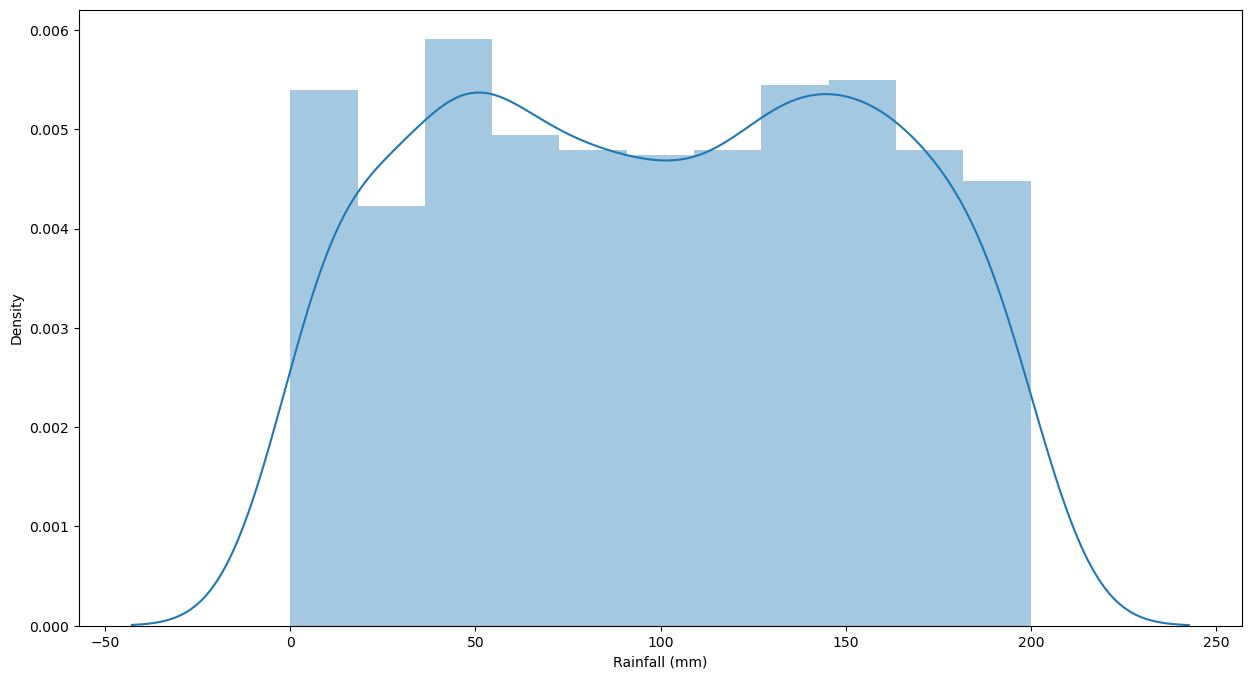

In [129]:
sns.distplot(df['Rainfall (mm)'],hist=True)
plt.show()

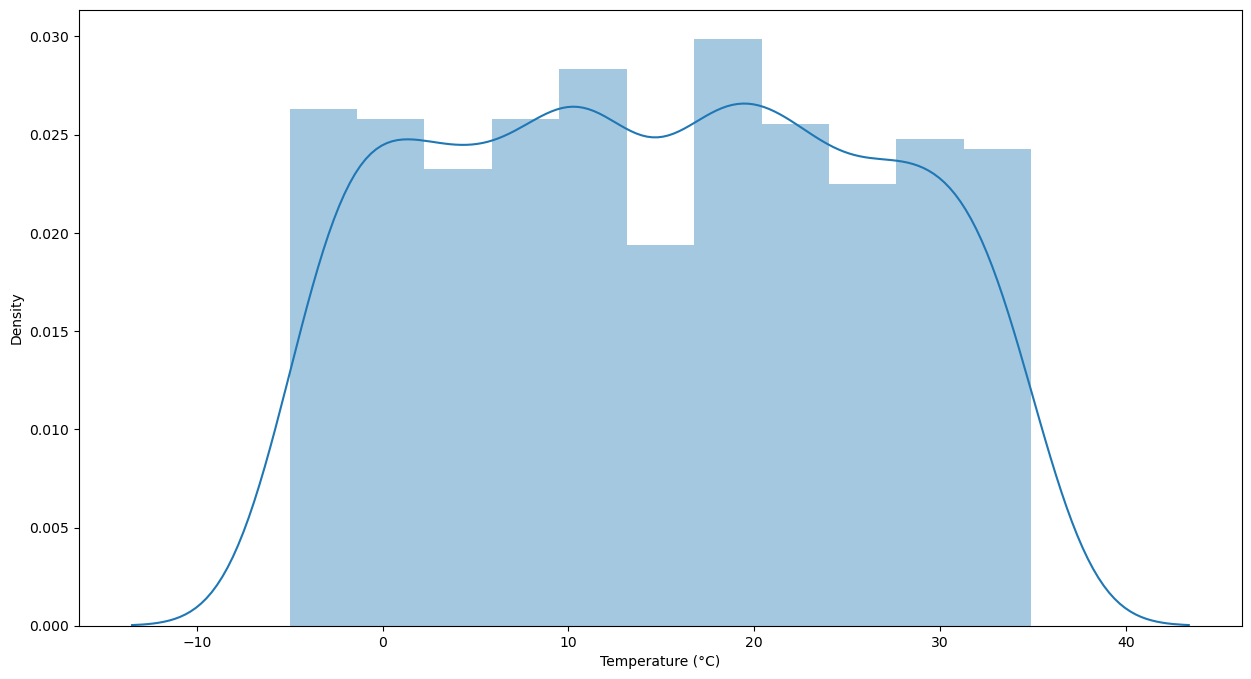

In [131]:
sns.distplot(df['Temperature (°C)'],hist=True)
plt.show()

# Step-13 Train Test Split

In [147]:
from sklearn.model_selection import train_test_split

In [149]:
X = df.drop(columns=['Rainfall (mm)'])
y = df['Rainfall (mm)'] 

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step-14 Scaling

#### MinMax Scaler

In [139]:
from sklearn.preprocessing import MinMaxScaler

In [141]:
minmax = MinMaxScaler()

In [143]:
minmax = MinMaxScaler()
df[['MinMax_Latitude', 'MinMax_Longitude']] = minmax.fit_transform(df[['Latitude', 'Longitude']])